In [3]:
# !pip install -q rpy2==3.5.1
!pip install -q --upgrade rpy2

In [4]:
%load_ext rpy2.ipython

OSError: cannot load library '/Library/Frameworks/R.framework/Resources/lib/libR.dylib': dlopen(/Library/Frameworks/R.framework/Resources/lib/libR.dylib, 2): no suitable image found.  Did find:
	/Library/Frameworks/R.framework/Resources/lib/libR.dylib: mach-o, but wrong architecture
	/Library/Frameworks/R.framework/Versions/4.2-arm64/Resources/lib/libR.dylib: mach-o, but wrong architecture

In [ ]:
'''
Authors: Daniel M. Low
License: See license in github repository
'''

import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import recall_score
import os



project_name = 'vfp'
filenames = ['annotations_ps_22-05-29T23-42-51.csv',
             'annotations_cjs_22-10-19T17-48-21.csv', 
             'annotations_ch_22-10-16T01-03-17.csv']
# pd.options.display.width = 0
pd.set_option("display.max_columns", None)
on_colab = False
if on_colab:
  from google.colab import drive
  drive.mount('/content/drive')
  input_dir = f'/content/drive/MyDrive/datum/{project_name}/data/output/annotations/'
  output_dir = f'/content/drive/MyDrive/datum/{project_name}/data/output/annotations/'
else:
  input_dir = './data/input/annotations/'
  output_dir = './data/output/annotations/'




In [3]:
os.getcwd()

'/content'

# Observe responses, fix formatting, identify mislabelled samples

In [4]:

filenames

['annotations_ps_22-05-29T23-42-51.csv',
 'annotations_cjs_22-10-19T17-48-21.csv',
 'annotations_ch_22-10-16T01-03-17.csv']

In [5]:
variables = pd.read_csv(input_dir + 'annotations_ch_22-10-16T01-03-17.csv', index_col = 0).columns.tolist()
variables.remove('file')
variables

['noise',
 'vfp',
 'severity',
 'roughness',
 'breathiness',
 'strain',
 'pitch',
 'loudness (in person)',
 'loudness (recording)']

In [6]:
for variable in variables:
  print(f'\n\n===={variable}====')
  
  counts_all = []
  for filename in filenames:
    annotator = filename.split('_')[1]
    df = pd.read_csv(input_dir + filename, index_col = 0)
    values = np.sort(df[variable].unique().tolist())
    print(annotator, ':', values)
    counts_i = pd.DataFrame(df[variable].value_counts())
    
    counts_i.columns = [variable+'_'+annotator]
    counts_i.index = [str(n) for n in counts_i.index]
    counts_all.append(counts_i)
    print()

    


  counts_all2 = pd.concat(counts_all,axis=1,ignore_index=False)
  # counts_all2 = pd.merge(counts_all, left_index=True, right_index=True, how='outer')
  # counts_all2 = counts_all[0].merge(counts_all[1], how = 'outer').merge(counts_all[2], how = 'outer')
  display(counts_all2)



====noise====
ps : [0 1 2]

cjs : ['0' '1' '2' 'o']

ch : [ 0  1  2 99]



,noise_ps,noise_cjs,noise_ch
0,67.0,84.0,105.0
1,49.0,53.0,30.0
2,35.0,13.0,11.0
o,NaN,1.0,NaN
99,NaN,NaN,5.0




====vfp====
ps : [0 1 2]

cjs : [0 1]

ch : [0 1]



,vfp_ps,vfp_cjs,vfp_ch
0,103,72.0,114.0
1,47,79.0,37.0
2,1,NaN,NaN




====severity====
ps : [ 0  2  4  5 10 15 20 25 30 35 40 50 60 70 75 80]

cjs : [ 0  3  5 10 12 14 15 18 20 22 25 28 30 33 35 36 38 40 42 45 48 55 58 60
 62 64 65 66 68 70 72 75 78 79 84 85 90]

ch : [ 0  2  3  5  8 10 12 15 20 23 24 25 30 33 35 40 45 50 56 60 67 68 70 75
 80 90 98 99]



,severity_ps,severity_cjs,severity_ch
5,49.0,3.0,18.0
0,27.0,2.0,35.0
50,14.0,NaN,3.0
10,13.0,12.0,14.0
40,11.0,5.0,10.0
75,7.0,4.0,2.0
20,6.0,18.0,7.0
30,5.0,12.0,9.0
80,4.0,NaN,3.0
70,4.0,7.0,7.0




====roughness====
ps : [ 0  5 10 15 20 25 30 35 40 50 59 60 70 75]

cjs : [ 0.  2.  5.  6.  8. 10. 12. 13. 15. 18. 20. 22. 25. 28. 29. 30. 33. 35.
 38. 40. 42. 45. 50. 52. 55. 58. 60. 62. 68. 70. 75. 78. 80. nan]

ch : [ 0  2  3  4  5  7  8  9 10 12 15 16 20 23 25 30 33 35 38 40 45 50 60 67
 70 75 76 77 78 79 80 85 89 95]



,roughness_ps,roughness_cjs,roughness_ch
0,43.0,NaN,44.0
5,40.0,NaN,13.0
10,16.0,NaN,6.0
50,11.0,NaN,1.0
20,11.0,NaN,5.0
...,...,...,...
76,NaN,NaN,1.0
2,NaN,NaN,1.0
85,NaN,NaN,1.0
12,NaN,NaN,1.0




====breathiness====
ps : [ 0  5 10 20 25 30 40 50 60 70 75 80]

cjs : [ 0  2  4  5  8 10 12 13 15 18 19 20 22 25 30 32 33 35 38 40 42 45 48 49
 50 52 55 58 62 65 70 72 75 77 80 82 85]

ch : [ 0.  1.  2.  3.  5.  8.  9. 10. 18. 20. 25. 30. 40. 45. 50. 60. 67. 70.
 77. 78. 80. 85. 89. 90. 97. 98. 99. nan]



,breathiness_ps,breathiness_cjs,breathiness_ch
0,85.0,49.0,NaN
30,15.0,4.0,NaN
5,10.0,9.0,NaN
10,8.0,19.0,NaN
40,7.0,1.0,NaN
...,...,...,...
1.0,NaN,NaN,1.0
80.0,NaN,NaN,1.0
85.0,NaN,NaN,1.0
9.0,NaN,NaN,1.0




====strain====
ps : [ 0.  1.  5. 10. 15. 20. 25. 30. 40. 45. 50. 60. 70. 75. 79. nan]

cjs : ['0' '0.0' '10' '10.0' '12' '12.0' '13' '14' '14.0' '15' '15.0' '18'
 '18.0' '20' '20.0' '22' '22.0' '220' '22\\5' '25' '25.0' '28' '28.0' '30'
 '32' '33' '35' '36' '38' '40' '40.0' '42.0' '45' '45.0' '48' '5' '5.0'
 '50' '50.0' '52' '55' '58' '58.0' '6' '60' '60.0' '62' '65' '65.0' '68.0'
 '70.0' '72' '73' '78' '8' '88.0' 'nan']

ch : [ 0  2  3  5  7  8  9 10 15 20 25 29 30 35 40 45 48 50 55 56 60 65 67 70
 77 80 90 99]



,strain_ps,strain_cjs,strain_ch
5.0,43.0,1.0,NaN
0.0,34.0,1.0,NaN
50.0,13.0,1.0,NaN
40.0,13.0,1.0,NaN
10.0,12.0,4.0,NaN
...,...,...,...
99,NaN,NaN,1.0
7,NaN,NaN,1.0
77,NaN,NaN,1.0
2,NaN,NaN,1.0




====pitch====
ps : [ 0.  5. 10. 15. 20. 25. 30. 35. 40. 50. 60. 75. nan]

cjs : [ 0.  5.  8. 10. 12. 15. 16. 18. 19. 20. 22. 25. 29. 30. 32. 35. 38. 40.
 42. 45. 48. 55. 60. 65. 68. 70. 75. 76. nan]

ch : [ 0.  1.  3.  5.  9. 10. 12. 15. 20. 23. 25. 30. 40. 50. 60. 70. nan]



,pitch_ps,pitch_cjs,pitch_ch
0.0,56.0,57.0,92.0
5.0,31.0,3.0,8.0
50.0,16.0,NaN,1.0
40.0,15.0,6.0,3.0
30.0,11.0,4.0,3.0
10.0,10.0,19.0,16.0
20.0,5.0,17.0,12.0
15.0,2.0,8.0,2.0
75.0,1.0,1.0,NaN
35.0,1.0,2.0,NaN




====loudness (in person)====
ps : [ 0  5 10 15 20 30 35 40 50 60 70 75 80]

cjs : [ 0.  2.  5.  9. 10. 15. 18. 20. 25. 30. 33. 35. 45. 50. 55. 60. 65. 70.
 nan]

ch : [ 0  2  3  5 10 15 20 25 30 34 35 40 45 50 60 90 99]



,loudness (in person)_ps,loudness (in person)_cjs,loudness (in person)_ch
0,45.0,NaN,95.0
5,38.0,NaN,4.0
40,21.0,NaN,1.0
10,14.0,NaN,16.0
50,7.0,NaN,1.0
30,6.0,NaN,7.0
75,5.0,NaN,NaN
20,5.0,NaN,10.0
80,4.0,NaN,NaN
60,3.0,NaN,2.0




====loudness (recording)====
ps : [ 1.  2.  3. nan]

cjs : [ 0.  1.  2.  3. 10. 20. nan]

ch : [ 1.  2.  3. nan]



,loudness (recording)_ps,loudness (recording)_cjs,loudness (recording)_ch
2.0,59.0,129,60.0
3.0,50.0,5,31.0
1.0,41.0,12,59.0
20.0,NaN,1,NaN
10.0,NaN,1,NaN
0.0,NaN,1,NaN


PS asked made the following typos


134: VFP = 1, NaN for all other values (or he would need to redo)


77: loudness (recording)


In [7]:
print(df.loc[134].values)
print([df.loc[134].values[0]] + ([np.nan]*(len(df.loc[134].values)-1)))
df.loc[134] = [df.loc[134].values[0]] + ([np.nan]*(len(df.loc[134].values)-1))
df.loc[134, 'vfp'] = 1
df.loc[134, 'noise'] = 2 #same as before
print(df.loc[134].values)

['VFPNorm66_Speech.wav' 1 0 5 5 0.0 5 0.0 0 1.0]
['VFPNorm66_Speech.wav', nan, nan, nan, nan, nan, nan, nan, nan, nan]
['VFPNorm66_Speech.wav' 2.0 1.0 nan nan nan nan nan nan nan]


In [8]:
filenames

['annotations_ps_22-05-29T23-42-51.csv',
 'annotations_cjs_22-10-19T17-48-21.csv',
 'annotations_ch_22-10-16T01-03-17.csv']

In [9]:
dfs = {}


for filename in filenames:
  annotator = filename.split('_')[1]
  print('===', filename)
  df = pd.read_csv(input_dir + filename, index_col = 0)
  df['noise'] = df['noise'].replace('o', 0).replace('99', np.nan).replace('99.0', np.nan).replace(99, np.nan)
  df['vfp'] = df['vfp'].replace(2, 1)
  df['loudness (recording)'] = df['loudness (recording)'].replace(20, np.nan).replace(10, np.nan).replace(0, np.nan)
  df['strain'] = df['strain'].replace('220', '20').replace("22\\5", '25')
  variables = df.columns
  for variable in variables:
    try: df[variable] =df[variable].astype(float) 
    except: 
      df[variable] =df[variable].astype(object) #for string columns

  if annotator == 'ps':
    # typos asked to be corrected
    assert df.loc[134, 'vfp'] == 0
    df.loc[134] = [df.loc[134].values[0]] + ([np.nan]*(len(df.loc[134].values)-1)) # setting NaN to other values which would need to be corrected
    df.loc[134, 'vfp'] = 1
    df.loc[134, 'noise'] = 2 #same as before
    print(df.loc[134].values)
    
    print("df.loc[77, 'loudness (recording)']", df.loc[77, 'loudness (recording)'])
    df.loc[77, 'loudness (recording)'] = 3


  
  y_true = [0 if 'Norm' in n else 1 for n in df.file.values ]
  df['y_true'] = y_true
  
  dfs[annotator] = df.sort_values('file').reset_index(drop = True)


  


=== annotations_ps_22-05-29T23-42-51.csv
['VFP67_Speech.wav' 2.0 1.0 nan nan nan nan nan nan nan]
df.loc[77, 'loudness (recording)'] nan
=== annotations_cjs_22-10-19T17-48-21.csv
=== annotations_ch_22-10-16T01-03-17.csv


# Plot performance split by annotator

In [10]:

  plt.rcParams["figure.figsize"] = (12,8)
  plt.rcParams.update({'font.size': 18})

In [11]:
run_this = False

if run_this:
  plt.rcParams["figure.figsize"] = (12,8)
  plt.rcParams.update({'font.size': 18})


  for variable in df.columns:
    if variable in ['file', 'y_true']:
        continue
    for i, (annotator, df) in enumerate(dfs.items()):
      if annotator == 'ps':
        annotator = 'Annotator 1'
      elif annotator == 'cjs':
        annotator = 'Annotator 2'
      elif annotator == 'ch':
        annotator = 'Annotator 3'
      
      
      

      
      if variable in ['noise', 'vfp', 'loudness (recording)']:
        plt.subplot(1, 3, i+1)
        # df.groupby('y_true')[variable].value_counts().unstack(0).plot.bar()
        # plt.title(f'{annotator}', size = 20)  
        # plt.xticks(rotation = 0)
        # plt.legend()
        bar_plot_df = df.groupby('y_true')[variable].value_counts().unstack(0)
        x_ticks = bar_plot_df.index.values
        control_values = bar_plot_df[0].values
        vfp_values = bar_plot_df[1].values
        
        width = 0.35
        rects1 = plt.bar(x_ticks - width/2, control_values, width, label='Controls')
        rects2 = plt.bar(x_ticks + width/2, vfp_values, width, label='VFP')
        plt.title(f'{annotator}', size = 20)  
        if i+1==1:
          plt.ylabel('Count')
        if i+1==2:
          plt.xlabel(variable.capitalize())
        if i+1==3:
          plt.legend()
        plt.ylim(0,76)
          
        

      else:
        # variables that range from 0 to 100
        plt.subplot(1, 3, i+1)
        x0 = df[df['y_true']==0][variable].values
        x1 = df[df['y_true']==1][variable].values
        alpha = 0.7
        plt.hist(x0, bins=10, alpha=alpha, label = 'Controls')
        plt.hist(x1, bins=10, alpha=alpha, label = 'VFP')
        # plt.legend()
        plt.title(f'{annotator}', size = 20)  
        if i+1==1:
          plt.ylabel('Count')
        if i+1==2:
          plt.xlabel(variable.capitalize())
        if i+1==3:
          plt.legend()
        plt.ylim(0,76)

          
    # plt.figure(figsize=(12, 8), dpi=150)
    # plt.savefig(output_dir+'/../annotations_figures/'+f'{variable}_split_by_annotator.png', dpi=300)
    plt.show()
    
    




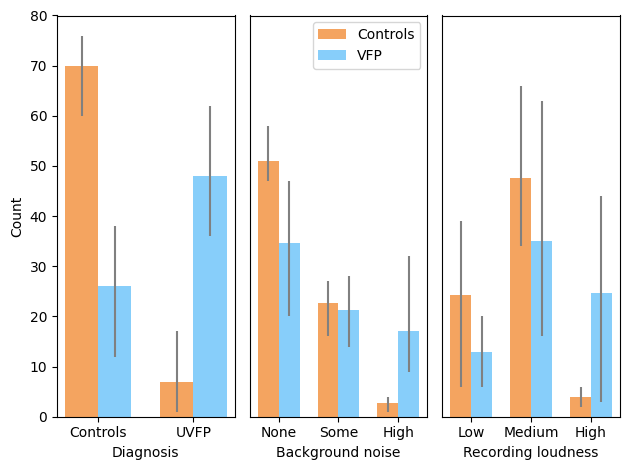

In [88]:
min_and_max = True
plt.rcParams["figure.figsize"] = (6,12)
plt.rcParams.update({'font.size': 16})
plt.style.use('default')

for i, variable in enumerate(['vfp', 'noise','loudness (recording)']):
  plt.subplot(1, 3, i+1)
  if variable in ['file', 'y_true']:
        continue
  # if variable in ['file', 'y_true']:
  #     continue


  control_values_all = []
  vfp_values_all = []
  for j, (annotator, df) in enumerate(dfs.items()):
    # if annotator == 'ps':
    #   annotator = 'Annotator 1'
    # elif annotator == 'cjs':
    #   annotator = 'Annotator 2'
    # elif annotator == 'ch':
    #   annotator = 'Annotator 3'
    

    if variable in ['noise', 'vfp', 'loudness (recording)']:
      
      # df.groupby('y_true')[variable].value_counts().unstack(0).plot.bar()
      # plt.title(f'{annotator}', size = 20)  
      
      # plt.legend()
      bar_plot_df = df.groupby('y_true')[variable].value_counts().unstack(0)
      x_ticks = bar_plot_df.index.values
      control_values = bar_plot_df[0].values
      vfp_values = bar_plot_df[1].values
      control_values_all.append(control_values)
      vfp_values_all.append(vfp_values)

  control_values_avg = np.mean(control_values_all,axis=0)
  vfp_values_avg = np.mean(vfp_values_all,axis=0)

  width = 0.35
  

  rects1 = plt.bar(x_ticks - width/2, control_values_avg, width, label='Controls', alpha = 1, color = 'sandybrown')
  
  if min_and_max:
    lower_error =  control_values_avg - np.min(np.array(control_values_all),axis=0)
    upper_error =  np.max(np.array(control_values_all),axis=0) - control_values_avg 
    asymmetric_error = np.array(list(zip(lower_error, upper_error))).T
    plt.errorbar(x_ticks - width/2, control_values_avg, yerr=asymmetric_error,
                ecolor = 'gray',linestyle='',)
  else:
    plt.errorbar(x_ticks - width/2, control_values_avg, yerr=np.std(control_values_all,axis=0),
                ecolor = 'gray',linestyle='',)
  
  
  
  
  rects2 = plt.bar(x_ticks + width/2, vfp_values_avg, width, label='VFP', alpha = 1, color = 'lightskyblue')
  if min_and_max:
    lower_error =  vfp_values_avg - np.min(np.array(vfp_values_all),axis=0)
    upper_error =  np.max(np.array(vfp_values_all),axis=0) - vfp_values_avg 
    asymmetric_error = np.array(list(zip(lower_error, upper_error))).T
    plt.errorbar(x_ticks + width/2,vfp_values_avg, yerr=asymmetric_error,
                ecolor = 'gray',
                 linestyle='',
                 )
    
  else:
    plt.errorbar(x_ticks + width/2, vfp_values_avg, yerr=np.std(vfp_values_all,axis=0),  
                 linestyle='',
                 ecolor = 'gray')
  # plt.title(f'{annotator}', size = 20)  

  

  # plt.xlabel(variable.capitalize())

  
  plt.ylim(0,80)

  if variable == 'noise':        
    plt.xticks(ticks = x_ticks, labels = ['None',"Some","High"])
    plt.xlabel('Background noise')

  if variable == 'vfp':        
    plt.xticks(ticks = x_ticks, labels = ['Controls', 'UVFP'])
    plt.xlabel('Diagnosis')

  if variable == 'loudness (recording)':        
    plt.xticks(ticks = x_ticks, labels = ['Low', 'Medium', 'High'])
    plt.xlabel('Recording loudness')

  if i == 1:
    plt.legend()
  if i in [1,2]:
    plt.yticks([], [])
  if i ==0:
    plt.ylabel('Count')

plt.tight_layout()
plt.savefig(output_dir+'/../annotations_figures/'+f'ordinal_aggregated.png', dpi=300)
plt.show()






In [15]:
df1 = dfs.get('ps')
df2 = dfs.get('cjs')
df3 = dfs.get('ch')
print(df1.shape,df2.shape,df3.shape,)
df_all = df1.merge(df2, on=['file','y_true'], how='inner', suffixes=('_1', '_2')).merge(df3, on=['file','y_true'], how='inner', suffixes=('', '_3'))
df_all.columns = [n+'_3' if '_' not in n else n for n in df_all.columns]
df_all

(151, 11) (151, 11) (151, 11)


,file_3,noise_1,vfp_1,severity_1,roughness_1,breathiness_1,strain_1,pitch_1,loudness (in person)_1,loudness (recording)_1,y_true,noise_2,vfp_2,severity_2,roughness_2,breathiness_2,strain_2,pitch_2,loudness (in person)_2,loudness (recording)_2,noise_3,vfp_3,severity_3,roughness_3,breathiness_3,strain_3,pitch_3,loudness (in person)_3,loudness (recording)_3
0,VFP10_Speech.wav,0.0,0.0,5.0,5.0,0.0,5.0,5.0,0.0,3.0,1,0.0,0.0,20.0,15.0,0.0,18.0,0.0,0.0,2.0,0.0,1.0,33.0,20.0,20.0,40.0,0.0,0.0,2.0
1,VFP11_Speech.wav,2.0,1.0,50.0,40.0,30.0,50.0,40.0,40.0,3.0,1,2.0,1.0,70.0,70.0,45.0,68.0,30.0,0.0,2.0,NaN,1.0,68.0,75.0,10.0,50.0,20.0,20.0,1.0
2,VFP12_Speech.wav,2.0,1.0,75.0,50.0,70.0,70.0,50.0,75.0,3.0,1,1.0,1.0,70.0,25.0,58.0,60.0,70.0,25.0,2.0,1.0,1.0,60.0,60.0,40.0,70.0,30.0,30.0,2.0
3,VFP13_Speech.wav,2.0,1.0,40.0,20.0,30.0,40.0,40.0,30.0,3.0,1,0.0,1.0,38.0,10.0,0.0,25.0,35.0,10.0,2.0,0.0,1.0,40.0,30.0,10.0,45.0,40.0,10.0,2.0
4,VFP14_Speech.wav,2.0,1.0,60.0,60.0,50.0,50.0,50.0,50.0,2.0,1,0.0,1.0,66.0,58.0,25.0,60.0,45.0,20.0,2.0,0.0,1.0,70.0,85.0,10.0,67.0,10.0,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,VFPNorm76_Speech.wav,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0,0.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,2.0,0.0,0.0,5.0,7.0,0.0,7.0,0.0,0.0,1.0
147,VFPNorm77_Speech.wav,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0,2.0,0.0,14.0,8.0,0.0,10.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
148,VFPNorm7_Speech.wav,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0,0.0,0.0,12.0,6.0,8.0,6.0,19.0,9.0,2.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,1.0
149,VFPNorm8_Speech.wav,0.0,0.0,20.0,20.0,5.0,20.0,20.0,10.0,2.0,0,0.0,1.0,35.0,30.0,33.0,22.0,10.0,0.0,2.0,0.0,0.0,23.0,30.0,20.0,30.0,10.0,10.0,1.0


In [18]:
df_longform = []
for i in [1,2,3]:
  df_annotator_i = df_all[['y_true',f'noise_{i}',f'vfp_{i}', f'severity_{i}', f'roughness_{i}',	f'breathiness_{i}',	f'strain_{i}',	f'pitch_{i}', f'loudness (in person)_{i}', f'loudness (recording)_{i}']]
  df_annotator_i.columns = ['Diagnosis','Noise', 'UVFP Rating', 'Severity', 'Roughness', 'Breathiness', 'Strain', 'Pitch', 'Loudness', 'Loudness recording']

  df_annotator_i['Annotator'] = [f'Annotator {i}']*df_annotator_i.shape[0]
  df_longform.append(df_annotator_i)
df_longform = pd.concat(df_longform,axis=0).reset_index(drop = True)
df_longform



<ipython-input-18-182c6221065e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_annotator_i['Annotator'] = [f'Annotator {i}']*df_annotator_i.shape[0]
<ipython-input-18-182c6221065e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_annotator_i['Annotator'] = [f'Annotator {i}']*df_annotator_i.shape[0]
<ipython-input-18-182c6221065e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

,Diagnosis,Noise,UVFP Rating,Severity,Roughness,Breathiness,Strain,Pitch,Loudness,Loudness recording,Annotator
0,1,0.0,0.0,5.0,5.0,0.0,5.0,5.0,0.0,3.0,Annotator 1
1,1,2.0,1.0,50.0,40.0,30.0,50.0,40.0,40.0,3.0,Annotator 1
2,1,2.0,1.0,75.0,50.0,70.0,70.0,50.0,75.0,3.0,Annotator 1
3,1,2.0,1.0,40.0,20.0,30.0,40.0,40.0,30.0,3.0,Annotator 1
4,1,2.0,1.0,60.0,60.0,50.0,50.0,50.0,50.0,2.0,Annotator 1
...,...,...,...,...,...,...,...,...,...,...,...
448,0,0.0,0.0,5.0,7.0,0.0,7.0,0.0,0.0,1.0,Annotator 3
449,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Annotator 3
450,0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,1.0,Annotator 3
451,0,0.0,0.0,23.0,30.0,20.0,30.0,10.0,10.0,1.0,Annotator 3


In [22]:
df_small = df_longform[['Diagnosis','Severity', 'Roughness',
       'Breathiness', 'Strain', 'Pitch', 'Loudness',]]

In [93]:

df_small

,Annotator,Diagnosis,Severity,Roughness,Breathiness,Strain,Pitch,Loudness
0,Annotator 1,1,5.0,5.0,0.0,5.0,5.0,0.0
1,Annotator 1,1,50.0,40.0,30.0,50.0,40.0,40.0
2,Annotator 1,1,75.0,50.0,70.0,70.0,50.0,75.0
3,Annotator 1,1,40.0,20.0,30.0,40.0,40.0,30.0
4,Annotator 1,1,60.0,60.0,50.0,50.0,50.0,50.0
...,...,...,...,...,...,...,...,...
447,Annotator 3,0,5.0,7.0,0.0,8.0,0.0,0.0
448,Annotator 3,0,5.0,7.0,0.0,7.0,0.0,0.0
449,Annotator 3,0,0.0,0.0,0.0,0.0,0.0,0.0
451,Annotator 3,0,23.0,30.0,20.0,30.0,10.0,10.0


In [98]:

df_small.columns

Index(['Annotator', 'Diagnosis', 'Severity', 'Roughness', 'Breathiness',
       'Strain', 'Pitch', 'Loudness'],
      dtype='object')

In [104]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for row in [0,1]:
  for col in [0,1,2]:
    variables = np.array([['Severity', 'Roughness', 'Breathiness'],
               ['Strain', 'Pitch', 'Loudness']])
               
    sns.kdeplot(ax=axes[row, col], data = df_small,x = variables[row, col], hue='Diagnosis', fill = True, legend= False)
    if row == 1 and col = 3:
      plt.legend()
    # sns.displot(ax=axes[row, col], data = df_small,x = variables[row, col], hue='Diagnosis', kind = 'kde', fill = True)

plt.show()

SyntaxError: ignored

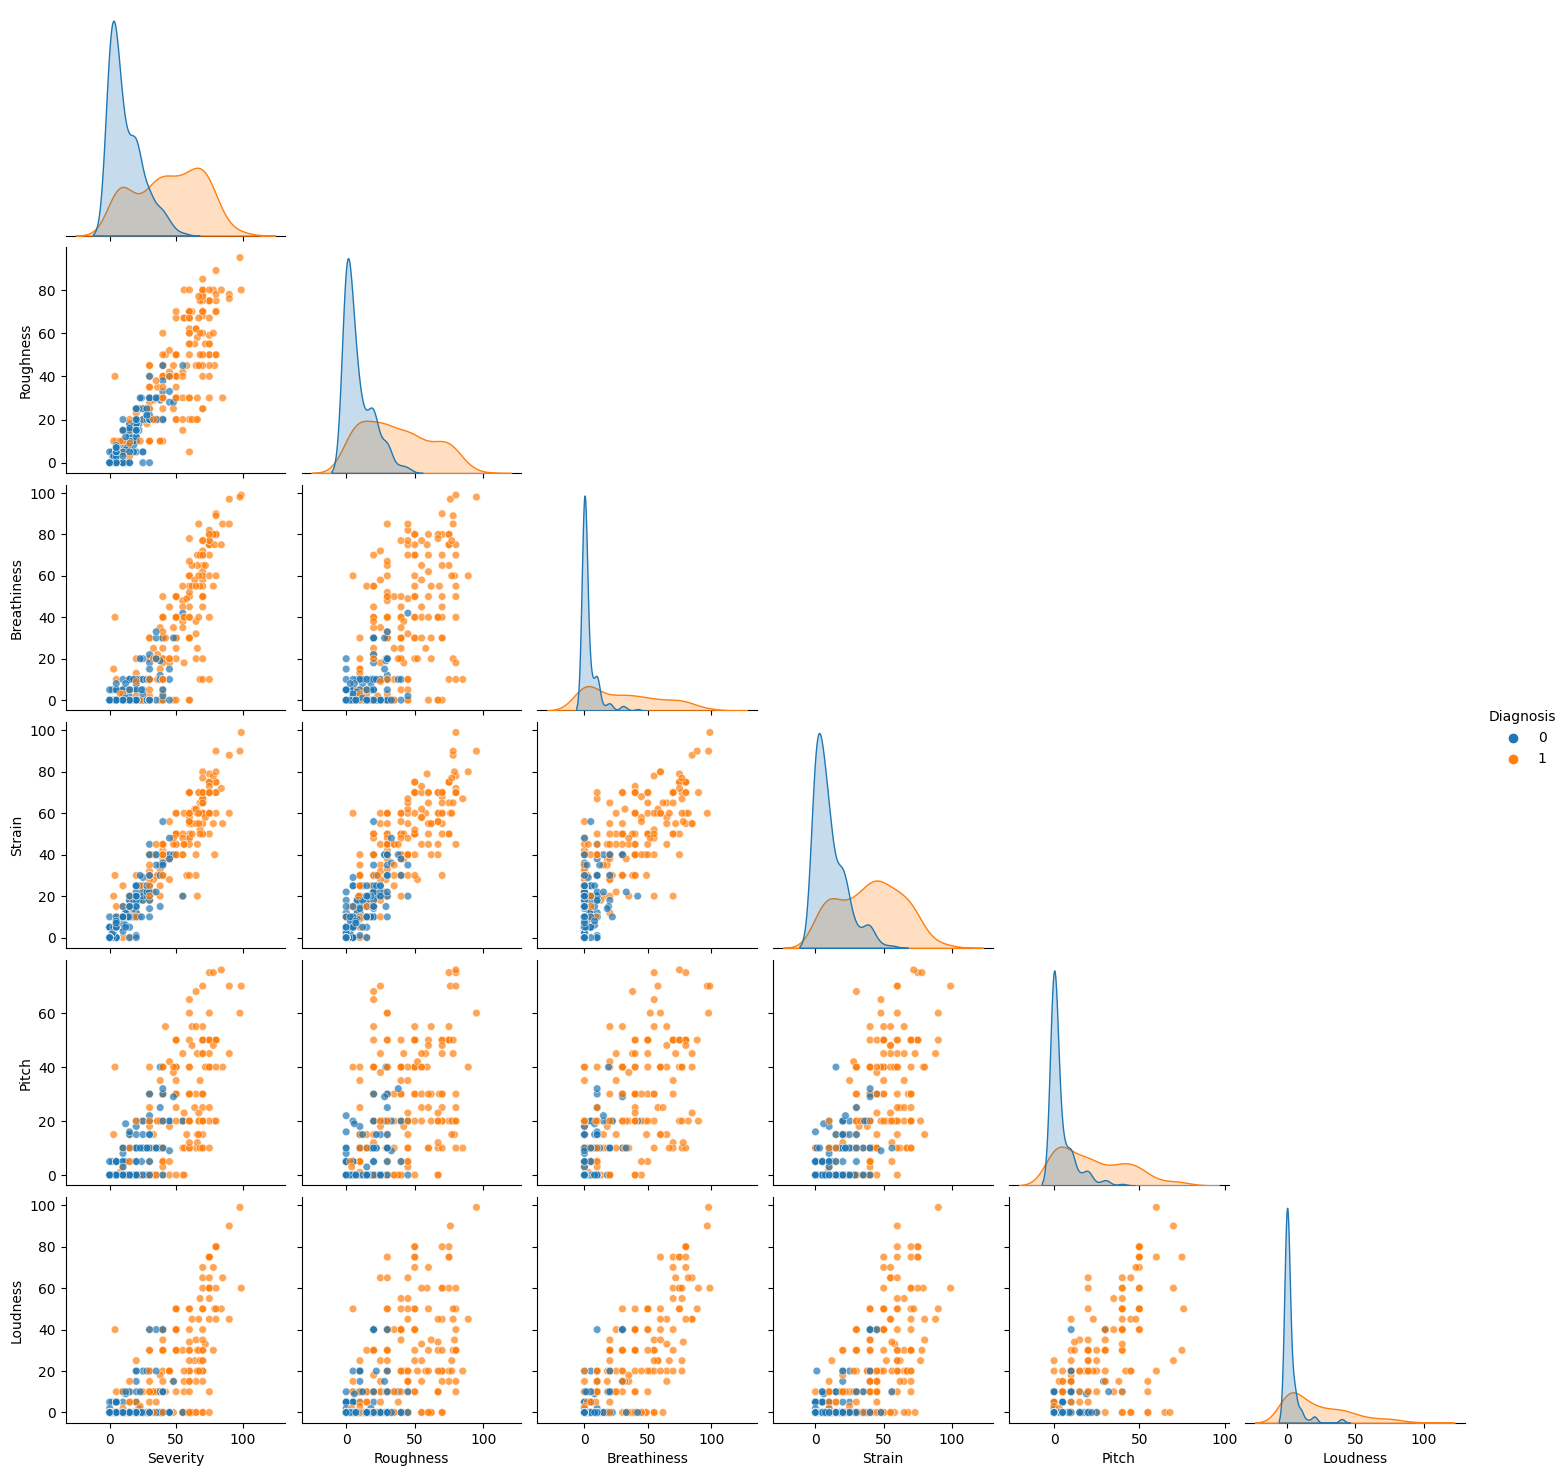

In [90]:
run_this = True
if run_this:
  sns.pairplot(df_small, hue="Diagnosis", 
              kind='scatter',
              diag_kind = "kde",
              corner=True,
              #  markers=["o", "s", "D"],
              plot_kws=dict(s=30, 
              #               #  edgecolor="white", 
                            #  linewidth=2.5, 
                            alpha=0.7)
              )


  # plt.savefig(output_dir+"pairplot_diagnosis.png", dpi=300)              
  plt.show()             

In [25]:
df_small

,Diagnosis,Severity,Roughness,Breathiness,Strain,Pitch,Loudness
0,1,5.0,5.0,0.0,5.0,5.0,0.0
1,1,50.0,40.0,30.0,50.0,40.0,40.0
2,1,75.0,50.0,70.0,70.0,50.0,75.0
3,1,40.0,20.0,30.0,40.0,40.0,30.0
4,1,60.0,60.0,50.0,50.0,50.0,50.0
...,...,...,...,...,...,...,...
448,0,5.0,7.0,0.0,7.0,0.0,0.0
449,0,0.0,0.0,0.0,0.0,0.0,0.0
450,0,0.0,0.0,NaN,0.0,0.0,0.0
451,0,23.0,30.0,20.0,30.0,10.0,10.0


In [54]:
from scipy import stats
def corrfunc(x, y, **kws):
    rho, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r={:.2f}".format(rho),
                xy=(.1, .9), xycoords=ax.transAxes)


In [55]:
df_small = df_longform[['Annotator','Diagnosis','Severity', 'Roughness',
       'Breathiness', 'Strain', 'Pitch', 'Loudness',]].dropna(axis=0)

In [ ]:
def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'spearman')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
#     print(abs(corr_r) *10000)
    
    marker_size = abs(corr_r) * 10000
    
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="coolwarm",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = 40 #abs(corr_r) * 40 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)
    



/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

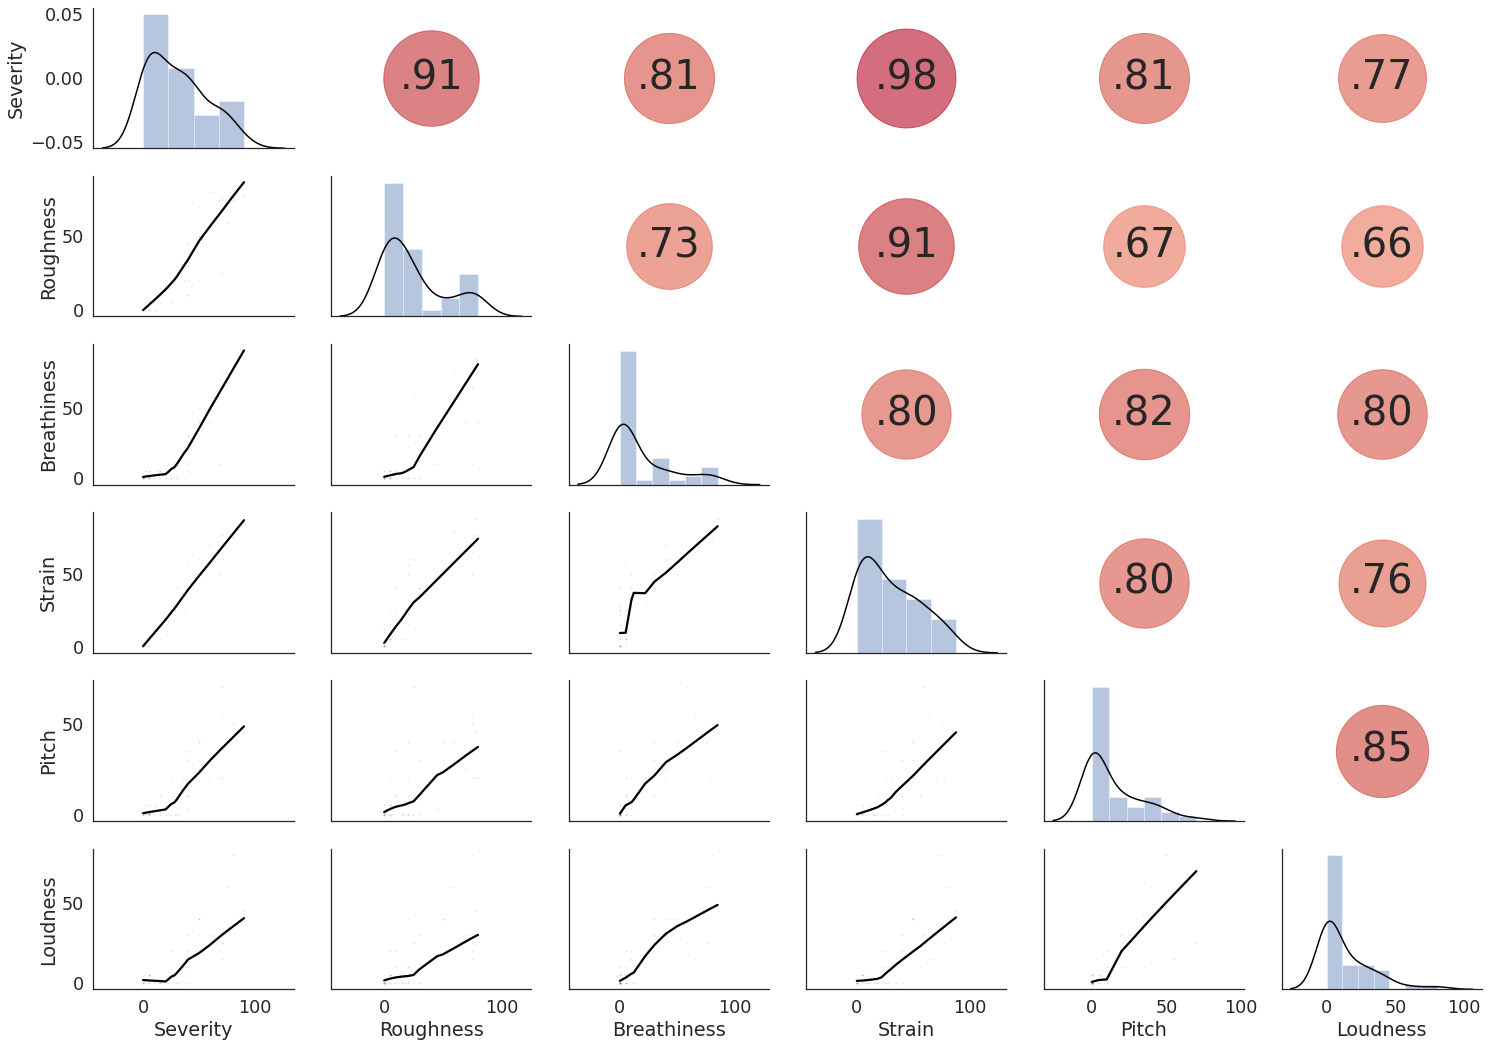

In [57]:
run_toy = True
# Pairwise correlation plot
sns.set(style='white', font_scale=1.6)
# iris = sns.load_dataset('iris')
if run_toy:
  g = sns.PairGrid(df_small.drop('Diagnosis',axis=1).sample(frac=0.1), aspect=1.4, diag_sharey=False)
else:
  g = sns.PairGrid(df_longform.drop('Diagnosis',axis=1), aspect=1.4, diag_sharey=False)
g.map_lower(sns.regplot, lowess=True, ci=True, line_kws={'color': 'black'}, fit_reg=True,
          x_jitter=.1, y_jitter=.1, 
            scatter_kws={"s": 1, "alpha":0.1}
            )
g.map_diag(sns.distplot, kde_kws={'color': 'black'})
g.map_upper(corrdot)
plt.show() 

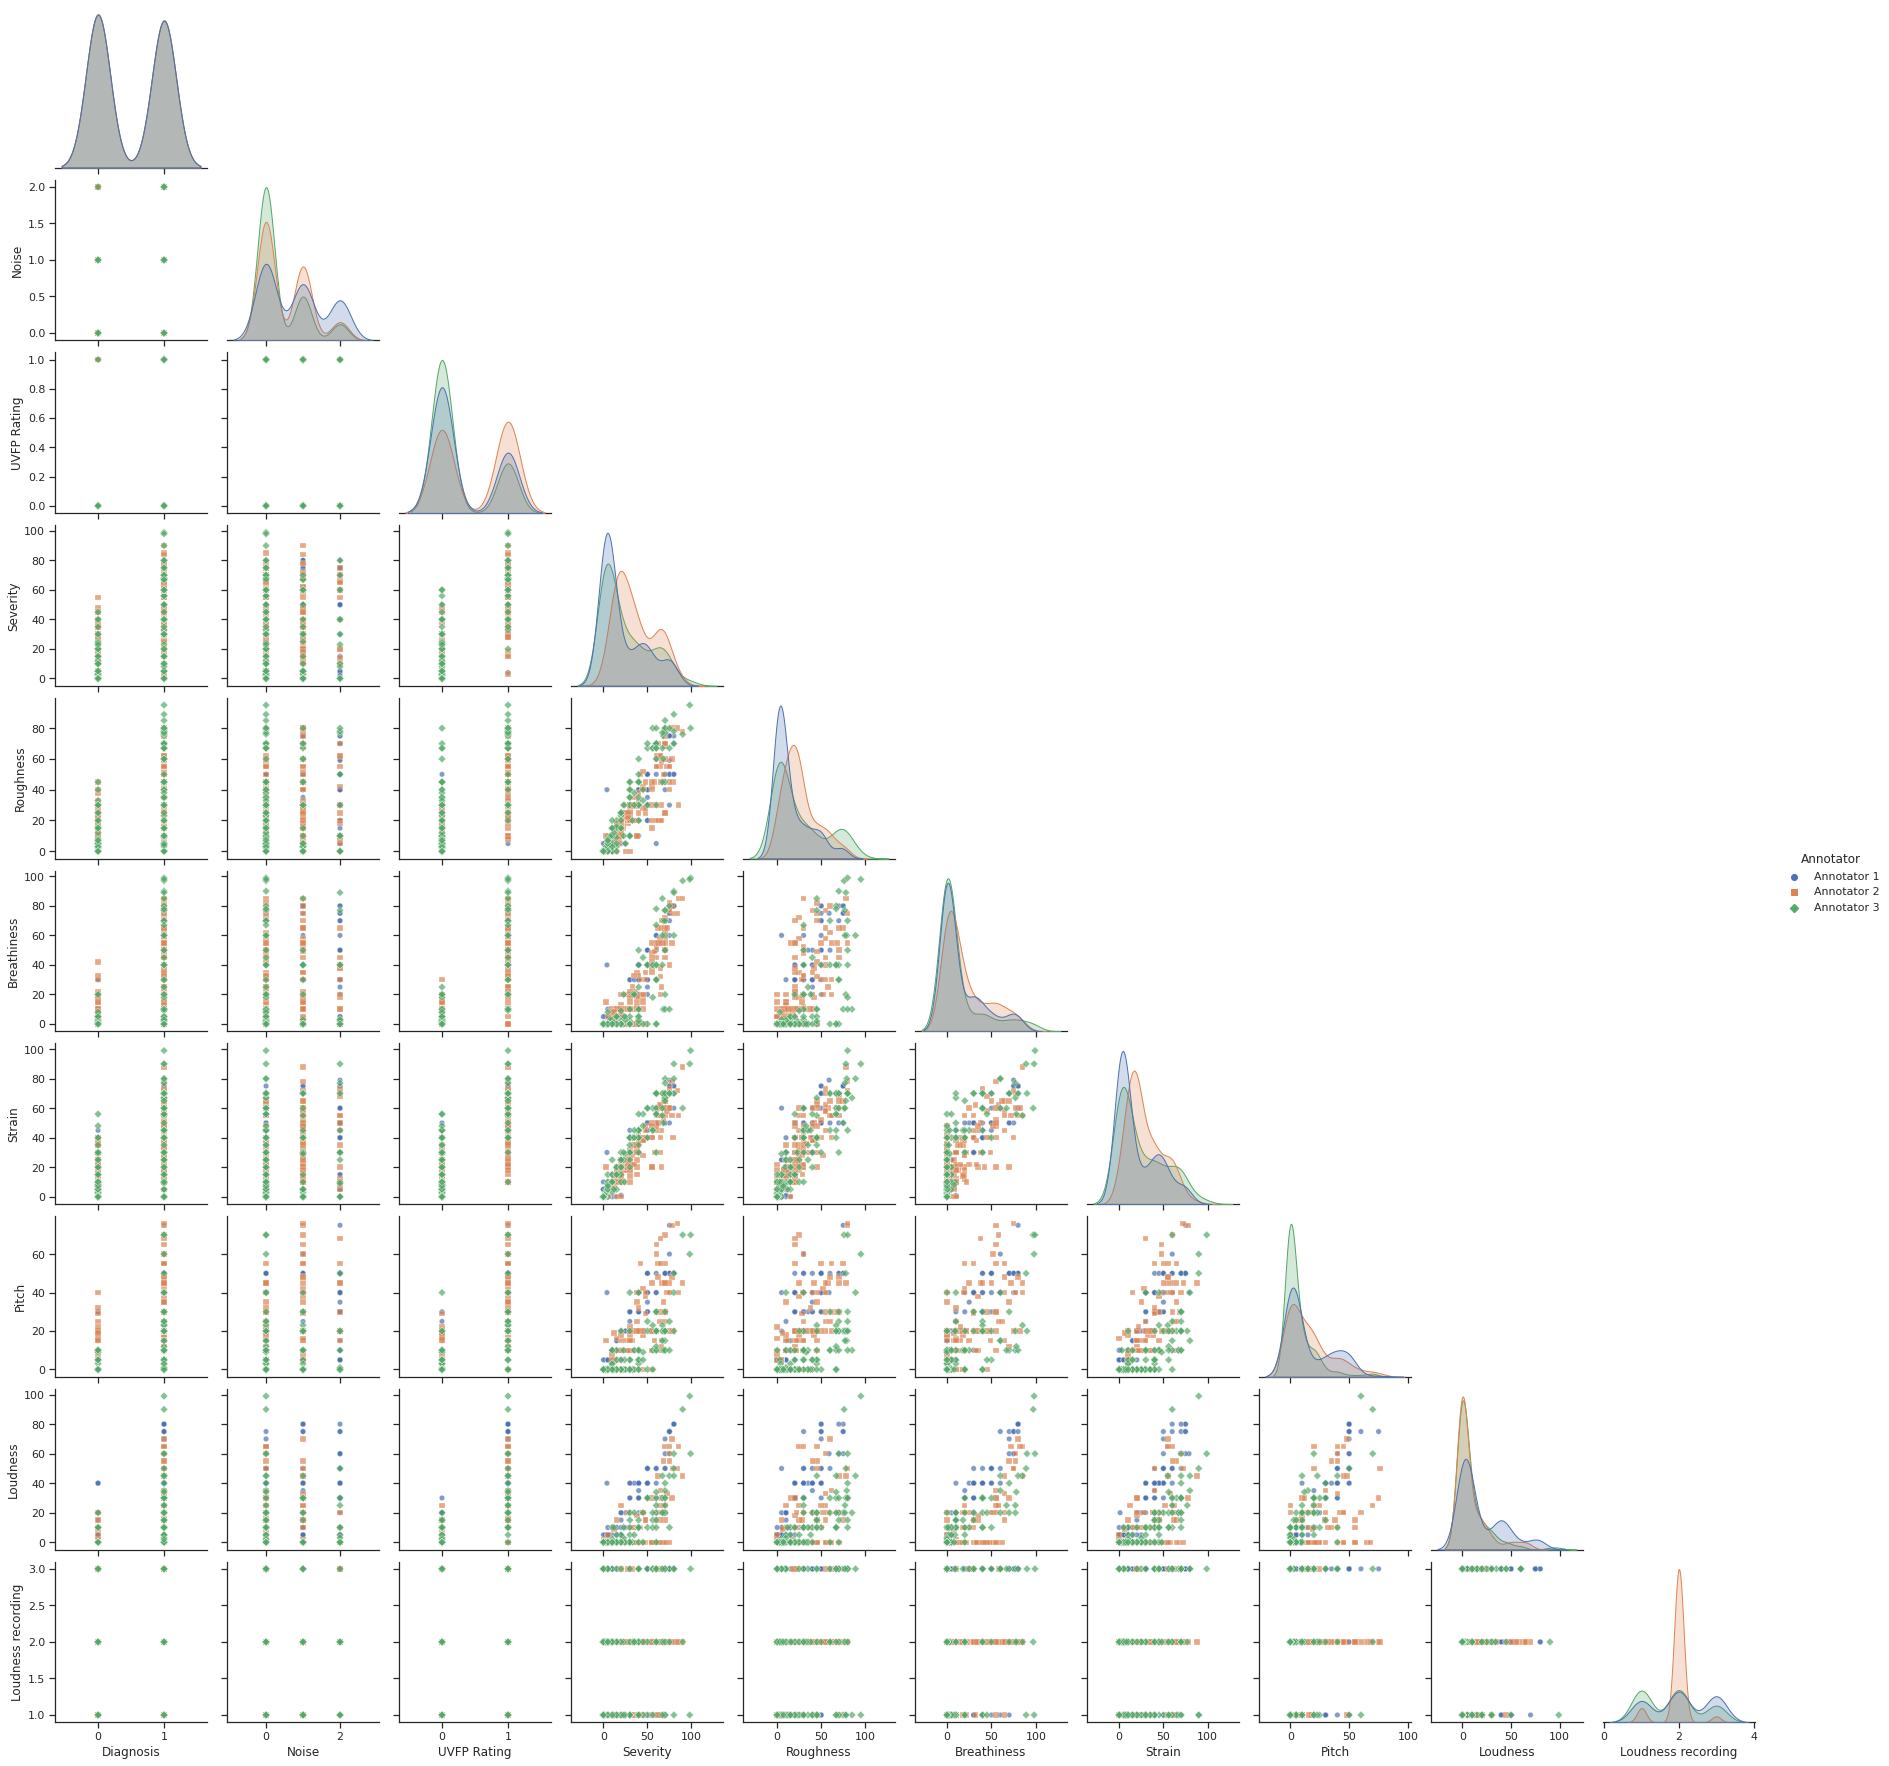

In [187]:
# df_small = df_longform[['Diagnosis','Rating','Noise', 'Severity', 'Loudness','Loudness recording',  'Annotator']]
sns.pairplot(df_longform, hue="Annotator", 
             kind='scatter',
             diag_kind = "kde",
             corner=True,
             markers=["o", "s", "D"],
             plot_kws=dict(s=30, 
            #               #  edgecolor="white", 
                          #  linewidth=2.5, 
                           alpha=0.7)
             )
             

plt.savefig(output_dir+"pairplot_annotator.png", dpi=300)              
plt.show() 

In [ ]:


  else:
    plt.subplot(1, 3, i+1)
    x0 = df[df['y_true']==0][variable].values
    x1 = df[df['y_true']==1][variable].values
    alpha = 0.7
    plt.hist(x0, bins=10, alpha=alpha, label = 'Controls')
    plt.hist(x1, bins=10, alpha=alpha, label = 'VFP')
    # plt.legend()
    plt.title(f'{annotator}', size = 20)  
    if i+1==1:
      plt.ylabel('Count')
    if i+1==2:
      plt.xlabel(variable.capitalize())
    if i+1==3:
      plt.legend()
    plt.ylim(0,76)

# Plots grouping annotators

In [ ]:
run_this = False

if run_this:
  plt.rcParams["figure.figsize"] = (12,8)
  plt.rcParams.update({'font.size': 18})


  for variable in df.columns:
    if variable in ['file', 'y_true']:
        continue
    for i, (annotator, df) in enumerate(dfs.items()):
      if annotator == 'ps':
        annotator = 'Annotator 1'
      elif annotator == 'cjs':
        annotator = 'Annotator 2'
      elif annotator == 'ch':
        annotator = 'Annotator 3'
      
      
      

      
      if variable in ['noise', 'vfp', 'loudness (recording)']:
        plt.subplot(1, 3, i+1)
        # df.groupby('y_true')[variable].value_counts().unstack(0).plot.bar()
        # plt.title(f'{annotator}', size = 20)  
        # plt.xticks(rotation = 0)
        # plt.legend()
        bar_plot_df = df.groupby('y_true')[variable].value_counts().unstack(0)
        x_ticks = bar_plot_df.index.values
        control_values = bar_plot_df[0].values
        vfp_values = bar_plot_df[1].values
        
        width = 0.35
        rects1 = plt.bar(x_ticks - width/2, control_values, width, label='Controls')
        rects2 = plt.bar(x_ticks + width/2, vfp_values, width, label='VFP')
        plt.title(f'{annotator}', size = 20)  
        if i+1==1:
          plt.ylabel('Count')
        if i+1==2:
          plt.xlabel(variable.capitalize())
        if i+1==3:
          plt.legend()
        plt.ylim(0,76)
          
        

      else:
        plt.subplot(1, 3, i+1)
        x0 = df[df['y_true']==0][variable].values
        x1 = df[df['y_true']==1][variable].values
        alpha = 0.7
        plt.hist(x0, bins=10, alpha=alpha, label = 'Controls')
        plt.hist(x1, bins=10, alpha=alpha, label = 'VFP')
        # plt.legend()
        plt.title(f'{annotator}', size = 20)  
        if i+1==1:
          plt.ylabel('Count')
        if i+1==2:
          plt.xlabel(variable.capitalize())
        if i+1==3:
          plt.legend()
        plt.ylim(0,76)

          
    # plt.figure(figsize=(12, 8), dpi=150)
    # plt.savefig(output_dir+'/../annotations_figures/'+f'{variable}_split_by_annotator.png', dpi=300)
    plt.show()
    
    




In [ ]:

dfs.keys()

dict_keys(['ps', 'cjs', 'ch'])

In [ ]:
11+9+9

29

(151, 11) (151, 11) (151, 11)


,file_3,noise_1,vfp_1,severity_1,roughness_1,breathiness_1,strain_1,pitch_1,loudness (in person)_1,loudness (recording)_1,y_true,noise_2,vfp_2,severity_2,roughness_2,breathiness_2,strain_2,pitch_2,loudness (in person)_2,loudness (recording)_2,noise_3,vfp_3,severity_3,roughness_3,breathiness_3,strain_3,pitch_3,loudness (in person)_3,loudness (recording)_3
0,VFP10_Speech.wav,0.0,0.0,5.0,5.0,0.0,5.0,5.0,0.0,3.0,1,0.0,0.0,20.0,15.0,0.0,18.0,0.0,0.0,2.0,0.0,0.0,20.0,15.0,0.0,18.0,0.0,0.0,2.0
1,VFP11_Speech.wav,2.0,1.0,50.0,40.0,30.0,50.0,40.0,40.0,3.0,1,2.0,1.0,70.0,70.0,45.0,68.0,30.0,0.0,2.0,2.0,1.0,70.0,70.0,45.0,68.0,30.0,0.0,2.0
2,VFP12_Speech.wav,2.0,1.0,75.0,50.0,70.0,70.0,50.0,75.0,3.0,1,1.0,1.0,70.0,25.0,58.0,60.0,70.0,25.0,2.0,1.0,1.0,70.0,25.0,58.0,60.0,70.0,25.0,2.0
3,VFP13_Speech.wav,2.0,1.0,40.0,20.0,30.0,40.0,40.0,30.0,3.0,1,0.0,1.0,38.0,10.0,0.0,25.0,35.0,10.0,2.0,0.0,1.0,38.0,10.0,0.0,25.0,35.0,10.0,2.0
4,VFP14_Speech.wav,2.0,1.0,60.0,60.0,50.0,50.0,50.0,50.0,2.0,1,0.0,1.0,66.0,58.0,25.0,60.0,45.0,20.0,2.0,0.0,1.0,66.0,58.0,25.0,60.0,45.0,20.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,VFPNorm76_Speech.wav,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0,0.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,2.0,0.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,2.0
147,VFPNorm77_Speech.wav,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0,2.0,0.0,14.0,8.0,0.0,10.0,0.0,0.0,2.0,2.0,0.0,14.0,8.0,0.0,10.0,0.0,0.0,2.0
148,VFPNorm7_Speech.wav,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0,0.0,0.0,12.0,6.0,8.0,6.0,19.0,9.0,2.0,0.0,0.0,12.0,6.0,8.0,6.0,19.0,9.0,2.0
149,VFPNorm8_Speech.wav,0.0,0.0,20.0,20.0,5.0,20.0,20.0,10.0,2.0,0,0.0,1.0,35.0,30.0,33.0,22.0,10.0,0.0,2.0,0.0,1.0,35.0,30.0,33.0,22.0,10.0,0.0,2.0


In [ ]:
# Import pandas
import pandas as pd
# Import rpy2 for dataframe conversion
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter
from rpy2.robjects import globalenv

def python_to_r(df, df_name = 'df'):
  # Convert the python dataframe to the R dataframe
  with localconverter(ro.default_converter + pandas2ri.converter):
    dfr = ro.conversion.py2rpy(df)
  # Create a variable name in R's global environment
  globalenv[df_name] = dfr
  return

def r_to_python(df):
  # Convert R Dataframe to python dataframe
  with localconverter(ro.default_converter + pandas2ri.converter):
    dfpd = ro.conversion.rpy2py(df)
  return

In [ ]:
%%R
install.packages("irr")
library("irr")

(as ‘lib’ is unspecified)














	‘/tmp/RtmpPARqjW/downloaded_packages’




,loudness (recording)_1,loudness (recording)_2,loudness (recording)_3
0,3.0,2.0,2.0
1,3.0,2.0,2.0
2,3.0,2.0,2.0
3,3.0,2.0,2.0
4,2.0,2.0,2.0
...,...,...,...
146,2.0,2.0,2.0
147,2.0,2.0,2.0
148,2.0,2.0,2.0
149,2.0,2.0,2.0


In [149]:

for variable in df1.columns:
  if variable in ['file', 'y_true']:
      continue
  df_var = df_all[[variable+'_1',variable+'_2',variable+'_3']]
  df_var = df_var.dropna(axis=0)
  python_to_r(df_var, 'df_var')
  print(variable, '='*30)
  if variable == 'vfp':    
    %R print(kappam.light(df_var))
    %R print(icc(df_var))
  else:
    %R print(icc(df_var))
  print()
  

    
    

  

noise ==============================
 Single Score Intraclass Correlation

   Model: oneway 
   Type : consistency 

   Subjects = 146 
     Raters = 3 
     ICC(1) = 0.287

 F-Test, H0: r0 = 0 ; H1: r0 > 0 
 F(145,292) = 2.21 , p = 5.9e-09 

 95%-Confidence Interval for ICC Population Values:
  0.184 < ICC < 0.394

vfp ==============================
 Light's Kappa for m Raters

 Subjects = 151 
   Raters = 3 
    Kappa = 0.559 

        z = 4.72 
  p-value = 2.4e-06 
 Single Score Intraclass Correlation

   Model: oneway 
   Type : consistency 

   Subjects = 151 
     Raters = 3 
     ICC(1) = 0.535

 F-Test, H0: r0 = 0 ; H1: r0 > 0 
 F(150,302) = 4.45 , p = 1.79e-28 

 95%-Confidence Interval for ICC Population Values:
  0.444 < ICC < 0.621

severity ==============================
 Single Score Intraclass Correlation

   Model: oneway 
   Type : consistency 

   Subjects = 150 
     Raters = 3 
     ICC(1) = 0.772

 F-Test, H0: r0 = 0 ; H1: r0 > 0 
 F(149,300) = 11.2 , p = 3.44e-68 

In [ ]:
dropped_nans = {}
for variable in df.columns:
  if variable in ['file', 'y_true']:
      continue
  df_var = df_all[[variable+'_1',variable+'_2',variable+'_3']]
  rows_original = df_var.shape[0]
  df_var = df_var.dropna(axis=0)
  rows_after_removing_nan = df_var.shape[0]
  dropped_rows = rows_original-rows_after_removing_nan
  dropped_nans[variable] = dropped_rows
  python_to_r(df_var, 'df_var')
  print(variable, '='*30)
  if variable == 'vfp':    
    %R print(kappam.light(df_var))
  else:
    %R print(icc(df_var))
  print()
  

    
    

  

noise ==============================
 Single Score Intraclass Correlation

   Model: oneway 
   Type : consistency 

   Subjects = 151 
     Raters = 3 
     ICC(1) = 0.48

 F-Test, H0: r0 = 0 ; H1: r0 > 0 
 F(150,302) = 3.77 , p = 7.3e-23 

 95%-Confidence Interval for ICC Population Values:
  0.384 < ICC < 0.572

vfp ==============================
 Light's Kappa for m Raters

 Subjects = 151 
   Raters = 3 
    Kappa = 0.687 

        z = 6.7 
  p-value = 2.05e-11 

severity ==============================
 Single Score Intraclass Correlation

   Model: oneway 
   Type : consistency 

   Subjects = 150 
     Raters = 3 
     ICC(1) = 0.783

 F-Test, H0: r0 = 0 ; H1: r0 > 0 
 F(149,300) = 11.8 , p = 6.27e-71 

 95%-Confidence Interval for ICC Population Values:
  0.727 < ICC < 0.83

roughness ==============================
 Single Score Intraclass Correlation

   Model: oneway 
   Type : consistency 

   Subjects = 149 
     Raters = 3 
     ICC(1) = 0.777

 F-Test, H0: r0 = 0 ; H1: r0

In [ ]:
dropped_nans

{'noise': 0,
 'vfp': 0,
 'severity': 1,
 'roughness': 2,
 'breathiness': 1,
 'strain': 3,
 'pitch': 4,
 'loudness (in person)': 2,
 'loudness (recording)': 6}

0 (0%) to 6 (4%) of samples were dropped because one of the three raters did not respond. 

In [ ]:
6/151.

0.039735099337748346

# Performance metrics humans 



=== Annotator 1
[0. 1.]


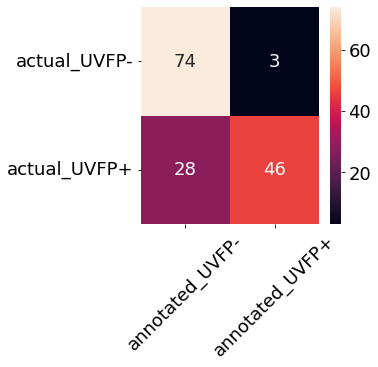

              annotated_UVFP-  annotated_UVFP+
actual_UVFP-               74                3
actual_UVFP+               28               46
              precision    recall  f1-score   support

           0       0.73      0.96      0.83        77
           1       0.94      0.62      0.75        74

    accuracy                           0.79       151
   macro avg       0.83      0.79      0.79       151
weighted avg       0.83      0.79      0.79       151

roc_auc 0.79
sensitivity 0.62
specificity 0.96
=== Annotator 2
[0. 1.]


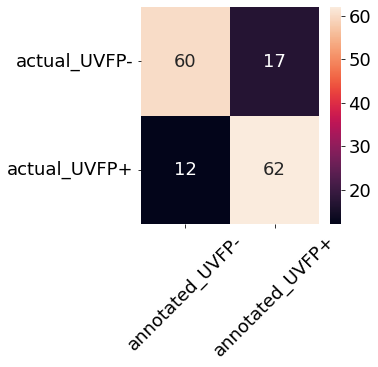

              annotated_UVFP-  annotated_UVFP+
actual_UVFP-               60               17
actual_UVFP+               12               62
              precision    recall  f1-score   support

           0       0.83      0.78      0.81        77
           1       0.78      0.84      0.81        74

    accuracy                           0.81       151
   macro avg       0.81      0.81      0.81       151
weighted avg       0.81      0.81      0.81       151

roc_auc 0.81
sensitivity 0.84
specificity 0.78
=== Annotator 3
[0. 1.]


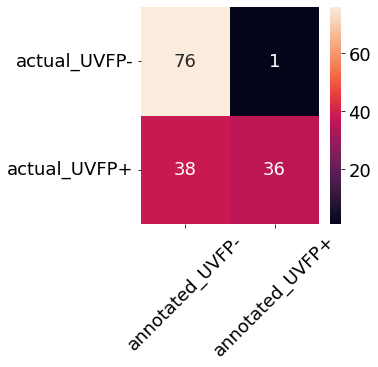

              annotated_UVFP-  annotated_UVFP+
actual_UVFP-               76                1
actual_UVFP+               38               36
              precision    recall  f1-score   support

           0       0.67      0.99      0.80        77
           1       0.97      0.49      0.65        74

    accuracy                           0.74       151
   macro avg       0.82      0.74      0.72       151
weighted avg       0.82      0.74      0.72       151

roc_auc 0.74
sensitivity 0.49
specificity 0.99


In [ ]:
plt.rcParams["figure.figsize"] = (4,4)
plt.rcParams.update({'font.size': 18})


results = {}

for i, (annotator, df) in enumerate(dfs.items()):
    if annotator == 'ps':
      annotator = 'Annotator 1'
    elif annotator == 'cjs':
      annotator = 'Annotator 2'
    elif annotator == 'ch':
      annotator = 'Annotator 3'

    print('===', annotator)

    y_pred = df.vfp.values
    print(np.unique(y_pred))
    y_pred[y_pred == 2] = 1
    y_true = [0 if 'Norm' in n else 1 for n in df.file.values ]
    df['y_true'] = y_true


    roc_auc = roc_auc_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)
    cm = pd.DataFrame(cm, index=['actual_UVFP-', 'actual_UVFP+'], columns=['annotated_UVFP-','annotated_UVFP+'  ])
    
    sns.heatmap(cm,annot=True)
    plt.xticks(rotation=45)
    plt.show()
    cr = classification_report(y_true, y_pred)


    sensitivity = recall_score(y_true, y_pred, pos_label=1)
    specificity = recall_score(y_true, y_pred, pos_label=0)

    print(cm)
    print(cr)
    metrics = [ roc_auc, sensitivity, specificity]
    names = [ 'roc_auc', 'sensitivity', 'specificity']
    for m, n in zip(metrics, names):
      print(n, np.round(m,2))

    results[annotator]=metrics


In [ ]:
results = pd.DataFrame(results, index = names).round(2)
results['Avg.'] = results.mean(axis=1)
results.T

,roc_auc,sensitivity,specificity
Annotator 1,0.79,0.62,0.96
Annotator 2,0.81,0.84,0.78
Annotator 3,0.74,0.49,0.99
Avg.,0.78,0.65,0.91


# Other

In [ ]:
print('controls having loudness (2 or 3 out of 3):', np.round(49/77*100,1),'%')
print('UVFP having loudness (2 or 3 out of 3):', np.round(60/74*100,1),'%')

print('controls having hi loudness (3 out of 3):', np.round(6/77*100, 1), '%')
print('UVFP having hi loudness (3 out of 3):', np.round(44/74*100,1),'%')

controls having loudness (2 or 3 out of 3): 63.6 %
UVFP having loudness (2 or 3 out of 3): 81.1 %
controls having hi loudness (3 out of 3): 7.8 %
UVFP having hi loudness (3 out of 3): 59.5 %


In [ ]:

print('controls having inferred loudness in person (2 or 3 out of 3):', np.round(49/77*100,1),'%')
print('UVFP having loudness (2 or 3 out of 3):', np.round(60/74*100,1),'%')

print('controls having hi loudness (3 out of 3):', np.round(6/77*100, 1), '%')
print('UVFP having hi loudness (3 out of 3):', np.round(44/74*100,1),'%')

controls having inferred loudness in person (2 or 3 out of 3): 63.6 %
UVFP having loudness (2 or 3 out of 3): 81.1 %
controls having hi loudness (3 out of 3): 7.8 %
UVFP having hi loudness (3 out of 3): 59.5 %
